In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('diabetes.csv')

In [3]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot: >

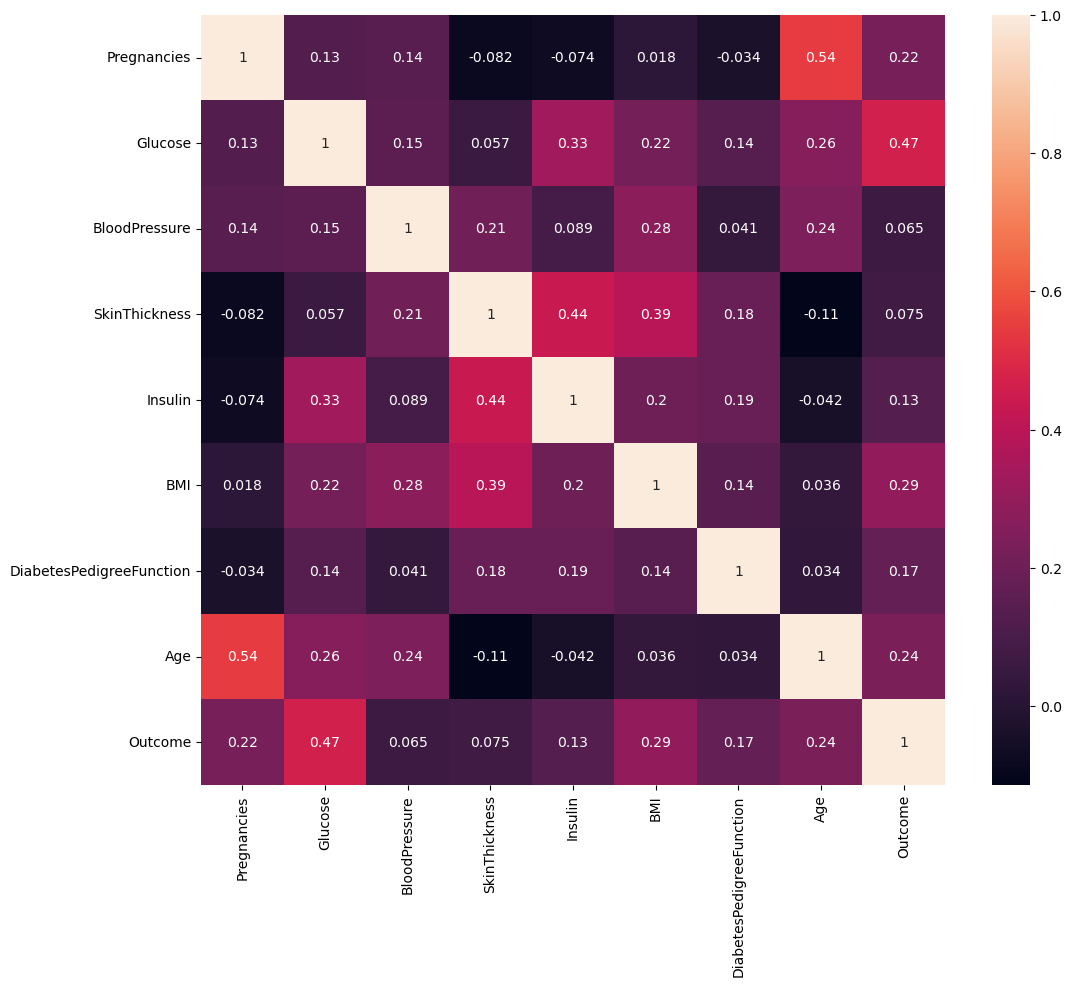

In [8]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)

* Glucose ,BMI and Age are the most important feature to predict diabetes

In [9]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
Tree=DecisionTreeClassifier(max_depth=3)

In [14]:
Tree.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3)

In [15]:
Y_pred=Tree.predict(X_test)

In [16]:
from sklearn import tree

[Text(0.5, 0.875, 'x[1] <= 154.5\ngini = 0.457\nsamples = 514\nvalue = [332, 182]'),
 Text(0.25, 0.625, 'x[7] <= 30.5\ngini = 0.382\nsamples = 432\nvalue = [321, 111]'),
 Text(0.125, 0.375, 'x[1] <= 127.5\ngini = 0.24\nsamples = 251\nvalue = [216, 35]'),
 Text(0.0625, 0.125, 'gini = 0.153\nsamples = 203\nvalue = [186, 17]'),
 Text(0.1875, 0.125, 'gini = 0.469\nsamples = 48\nvalue = [30, 18]'),
 Text(0.375, 0.375, 'x[5] <= 26.95\ngini = 0.487\nsamples = 181\nvalue = [105, 76]'),
 Text(0.3125, 0.125, 'gini = 0.105\nsamples = 36\nvalue = [34, 2]'),
 Text(0.4375, 0.125, 'gini = 0.5\nsamples = 145\nvalue = [71, 74]'),
 Text(0.75, 0.625, 'x[5] <= 28.7\ngini = 0.232\nsamples = 82\nvalue = [11, 71]'),
 Text(0.625, 0.375, 'x[5] <= 25.35\ngini = 0.486\nsamples = 12\nvalue = [5, 7]'),
 Text(0.5625, 0.125, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.6875, 0.125, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.875, 0.375, 'x[6] <= 1.428\ngini = 0.157\nsamples = 70\nvalue = [6, 64]'),


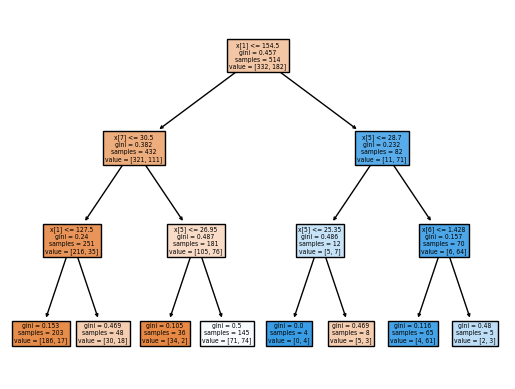

In [17]:
tree.plot_tree(Tree,filled=True)

In [18]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [19]:
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[117  51]
 [ 27  59]]
0.6929133858267716
              precision    recall  f1-score   support

           0       0.81      0.70      0.75       168
           1       0.54      0.69      0.60        86

    accuracy                           0.69       254
   macro avg       0.67      0.69      0.68       254
weighted avg       0.72      0.69      0.70       254



In [20]:
parameter={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2']}

In [21]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
treeclassifier=DecisionTreeClassifier()
clf=GridSearchCV(treeclassifier,param_grid=parameter,cv=5,scoring='accuracy')

In [24]:
clf.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [25]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'log2',
 'splitter': 'best'}

In [26]:
Y1_pred=clf.predict(X_test)

In [27]:
print(confusion_matrix(Y_test,Y1_pred))
print(accuracy_score(Y_test,Y1_pred))
print(classification_report(Y_test,Y1_pred))

[[145  23]
 [ 46  40]]
0.7283464566929134
              precision    recall  f1-score   support

           0       0.76      0.86      0.81       168
           1       0.63      0.47      0.54        86

    accuracy                           0.73       254
   macro avg       0.70      0.66      0.67       254
weighted avg       0.72      0.73      0.72       254



In [28]:
Tree1=DecisionTreeClassifier(criterion= 'gini', max_depth= 7,max_features= 'log2',splitter= 'best',min_samples_split=3,min_samples_leaf=2)

In [29]:
Tree1.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=7, max_features='log2', min_samples_leaf=2,
                       min_samples_split=3)

In [30]:
Y2_pred=Tree1.predict(X_test)

In [31]:
print(confusion_matrix(Y_test,Y2_pred))
print(accuracy_score(Y_test,Y2_pred))
print(classification_report(Y_test,Y2_pred))

[[133  35]
 [ 38  48]]
0.7125984251968503
              precision    recall  f1-score   support

           0       0.78      0.79      0.78       168
           1       0.58      0.56      0.57        86

    accuracy                           0.71       254
   macro avg       0.68      0.67      0.68       254
weighted avg       0.71      0.71      0.71       254

